## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Goal:

- Develop a model to find the variables which are significant in predicting the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

#### The Solution is divided into the following sections:

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building and evaluation

## Step 1: Reading dataset and Understanding the Data

#### Let's start with the following steps:

- Importing data using the pandas library
- Understanding the structure of the data

In [1]:
#importing data libraries
import pandas as pd
import numpy as np

#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#import linear regression libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing and reading dataset

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Let's look at the number of rows and columns in the dataset
bike.shape

(730, 16)

In [4]:
# Understanding the feature name in dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Summary of the dataset : 730 Rows, 16 Columns, no null values

In [6]:
# Getting insight of the features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,3.000000,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.004795,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step2: Cleaning Data

### Drop columns that are not useful for analysis

- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [7]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
#But since the dteday column doesn't have a uniform format (as some are in dd-MM-yyyy format and some are in dd/MM/yyyy format)
#So lets convert them into uniform format

In [8]:
bike['dteday'] = bike.dteday.apply(lambda x: x.replace('/','-'))

In [9]:
#Now let us introduce a days_old variable which indicates how old is the business
startDate = pd.to_datetime('01-01-2018',format= '%d-%m-%Y')
bike['days_old'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - startDate).dt.days

In [10]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,1-1-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2-1-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,3-1-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,4-1-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,5-1-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [11]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

### Handle Missing values
#### As we have already seen there are no missing values. However, let us verify it again

In [12]:
#Print null counts by column
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

**Inference**: There are no null values.

### Handle Outliers

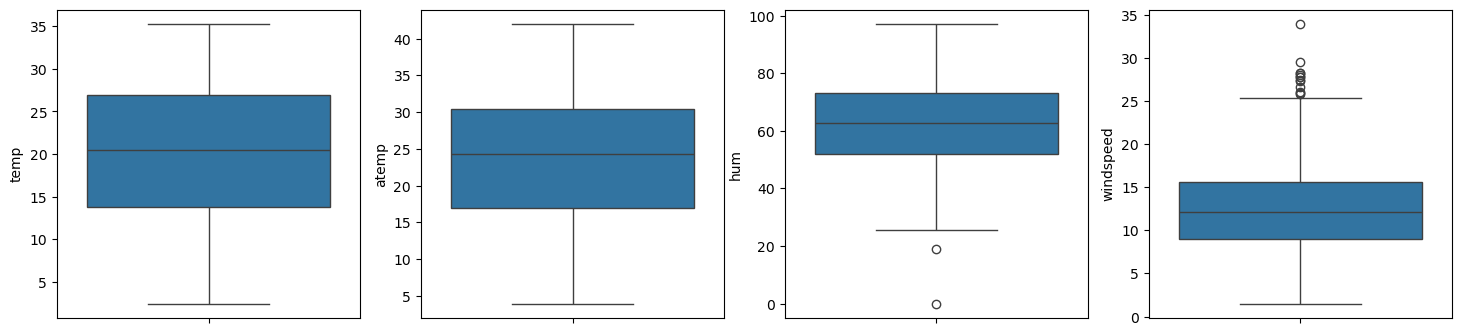

In [13]:
# Draw box plots for independent variables with continuous values

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

**Inference**: From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

#### Convert season and weathersit into categorical types

In [14]:
#season
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

#weathersit
bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

#mnth
bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

#weekday
bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [15]:
#Lets define numerical and categorical variables
num_vars=['temp','atemp','hum','windspeed','days_old','cnt']
cat_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit']

### Draw pair plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

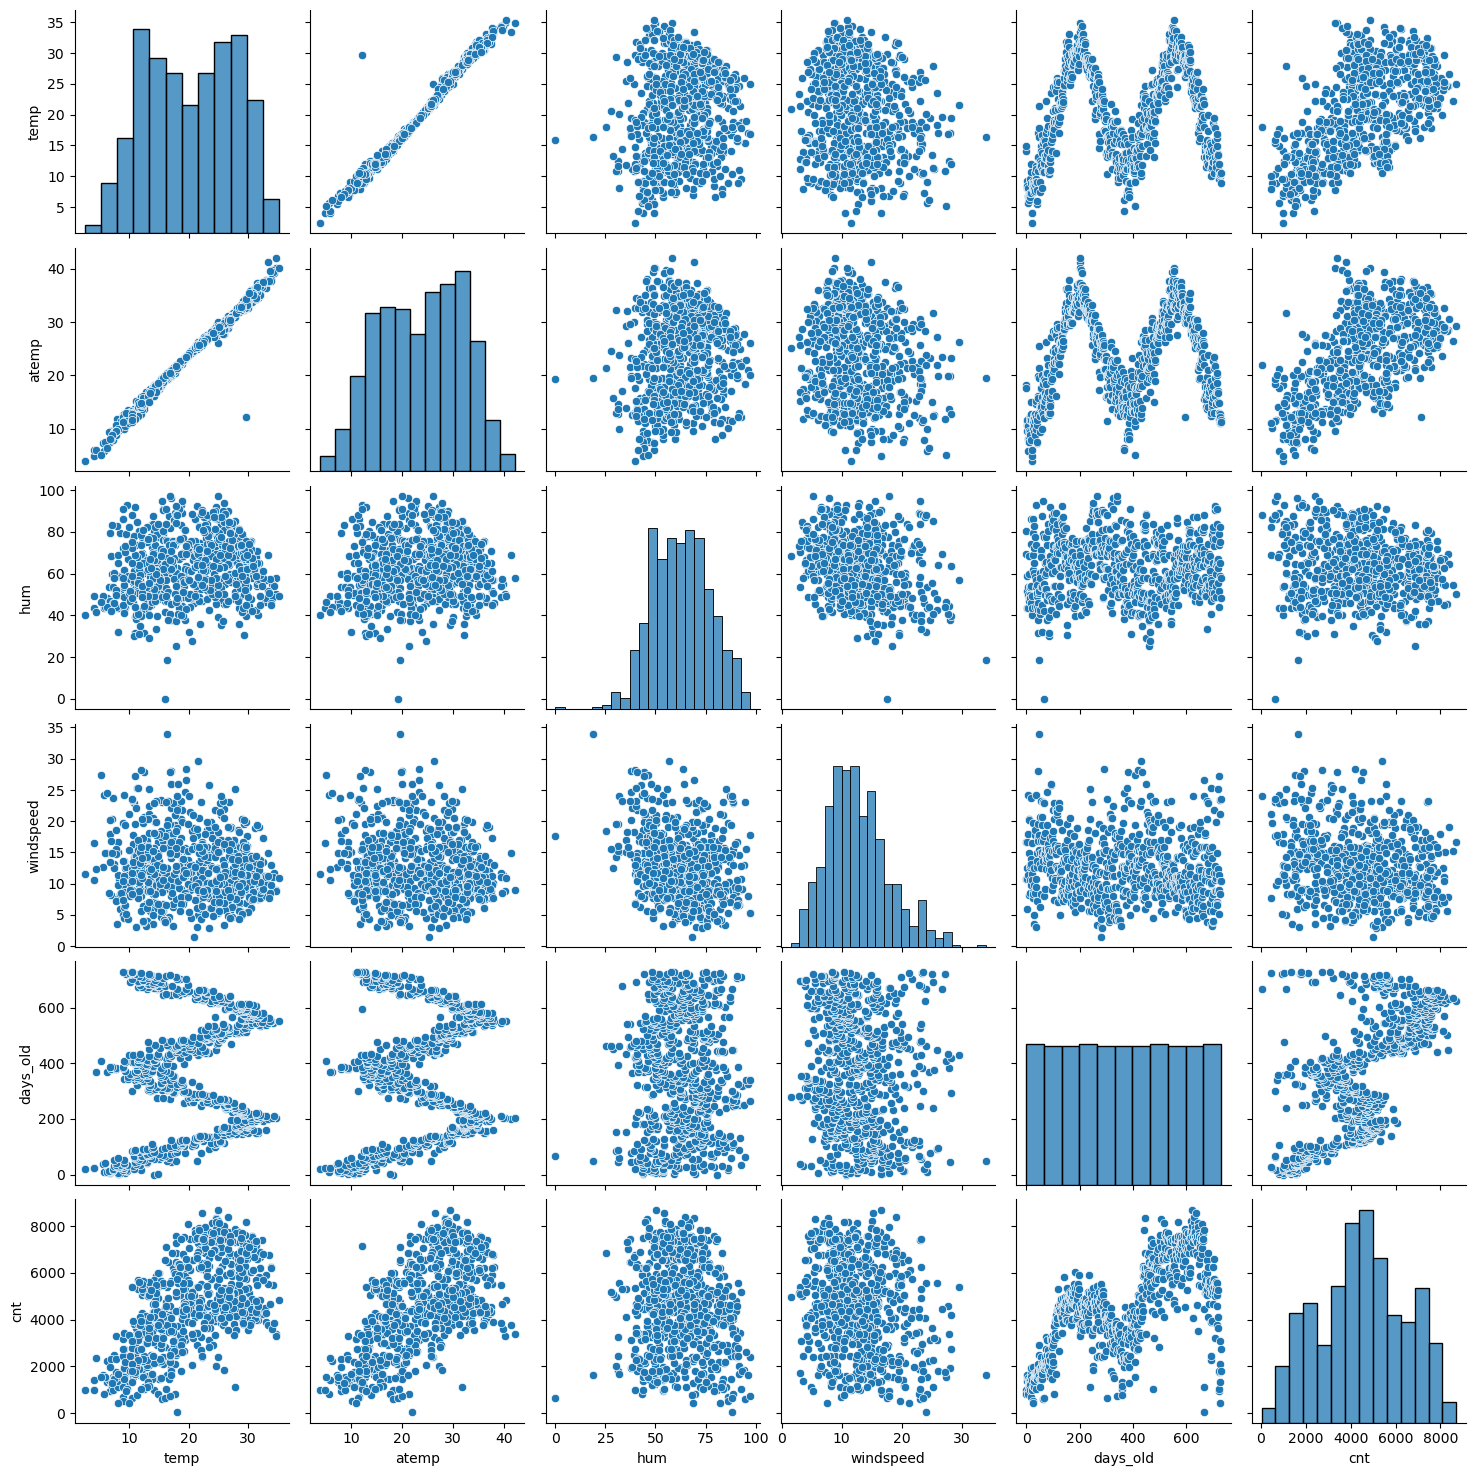

In [20]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=num_vars)
plt.show()

#### Inference:

- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other


#### As seen from the correlation map, output variable "cnt" has a linear relationship with variables like temp, atemp.

### Visualising the data to find the correlation between the numerical variable

<Figure size 2000x1500 with 0 Axes>

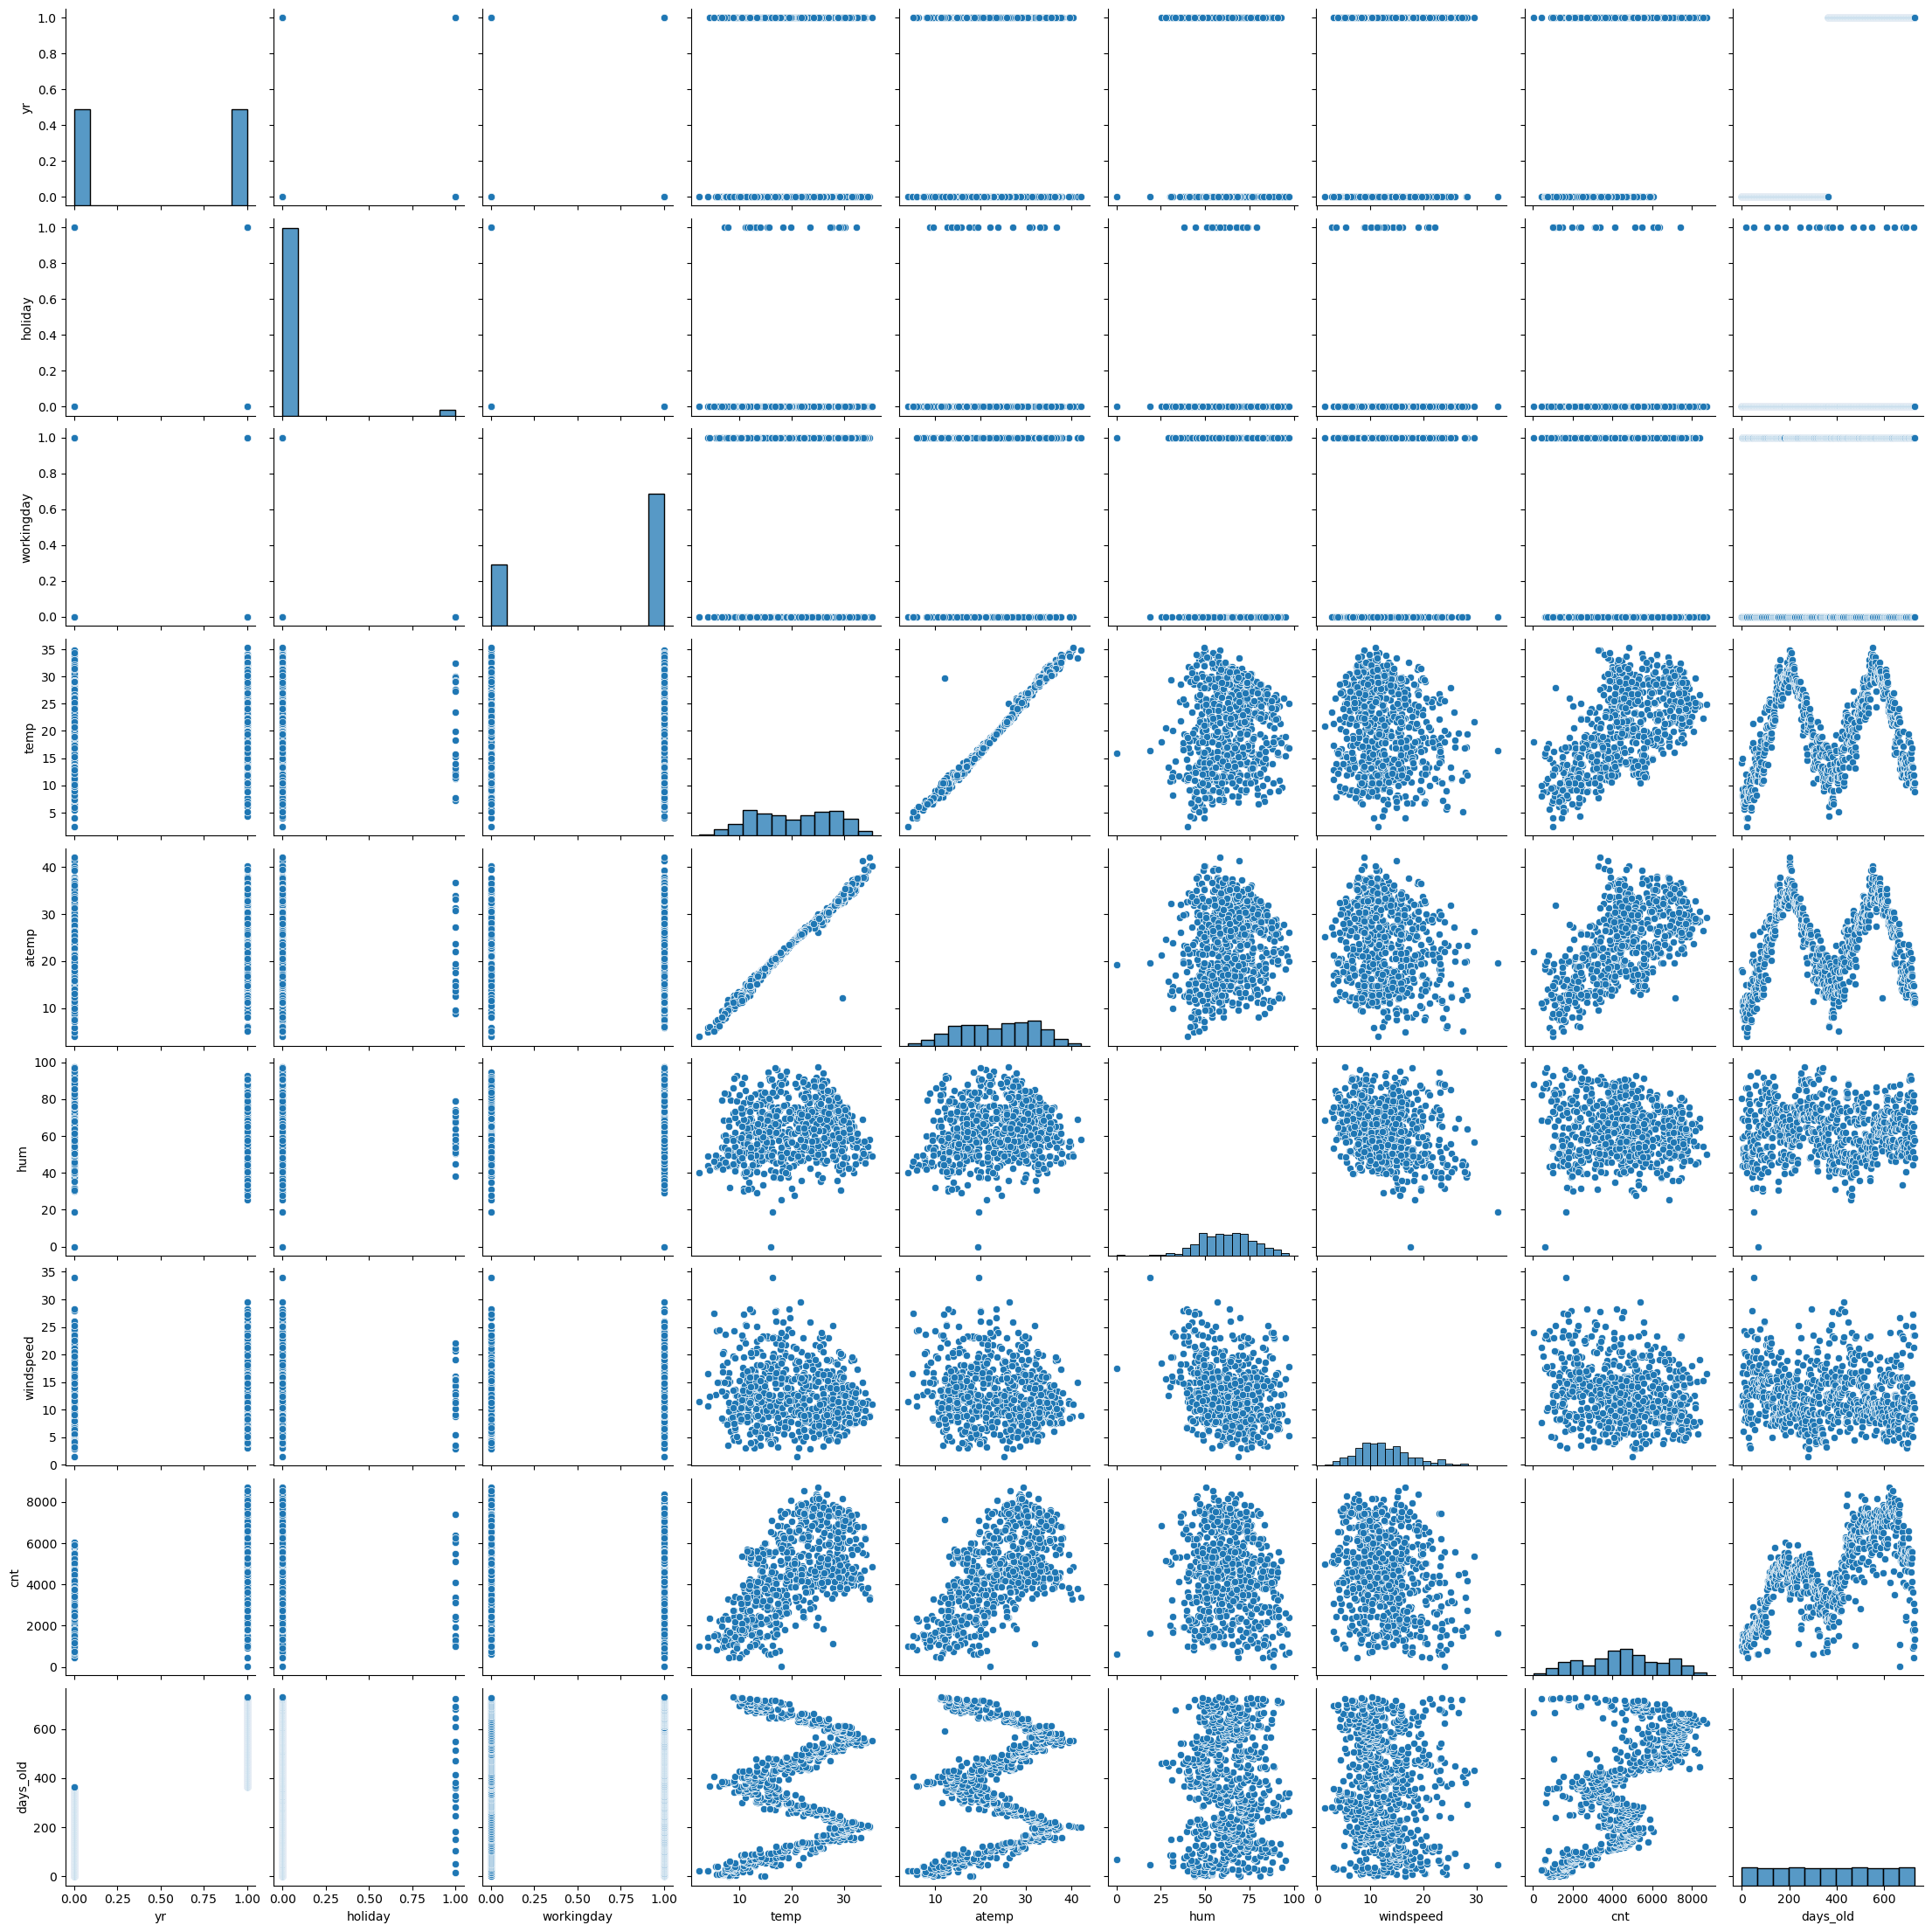

In [21]:
plt.figure(figsize=(20,15))
sns.pairplot(bike)
plt.show()

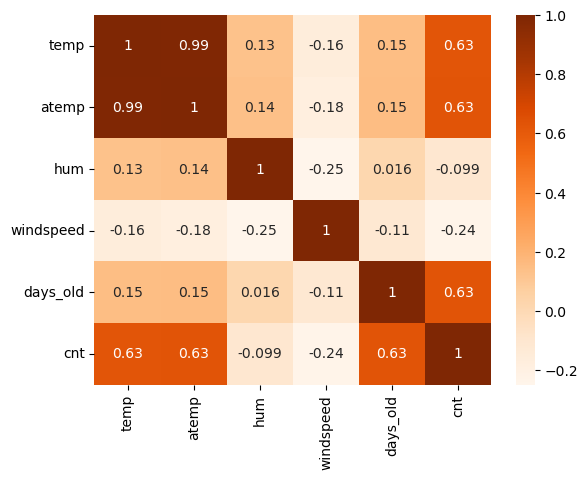

In [22]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[num_vars].corr(), cmap='Oranges', annot = True)
plt.show()

**Inference**: From the correlation map, temp, atemp and days_old seems to be highly correlated and only one variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
We also see Target variable has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

### Analysing categorical variabels with target variables

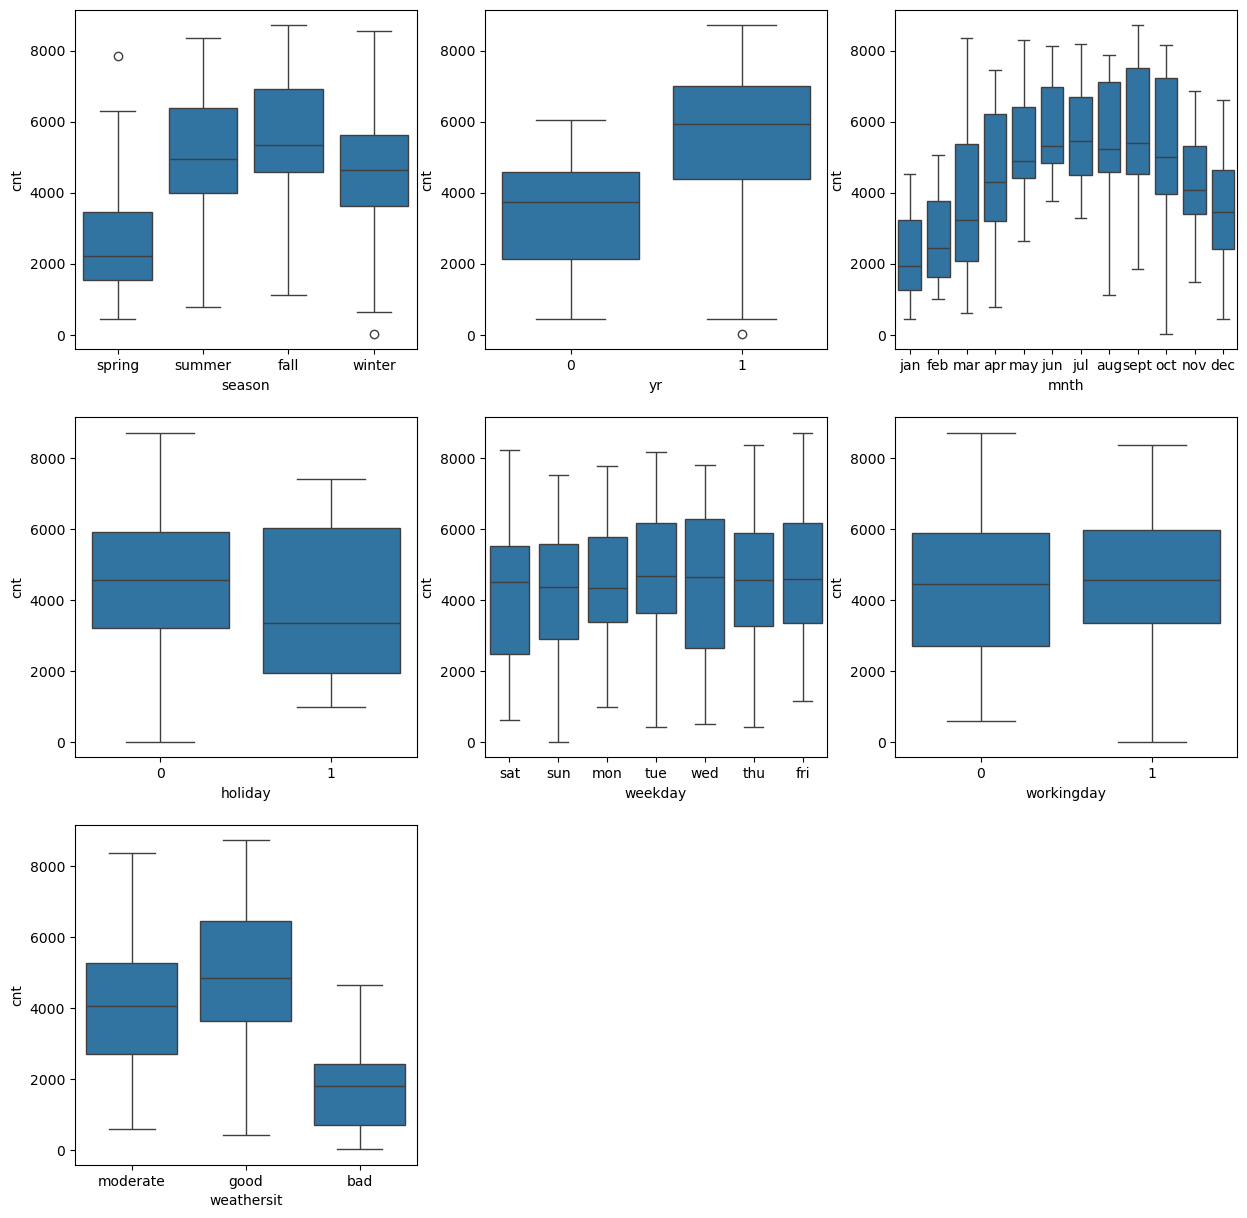

In [23]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

**Inference**:

Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.


## Step 3: Data Preparation for Linear Regression

### Create dummy variables for all categorical variables

In [24]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [25]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday","weathersit"],drop_first=True, dtype=int)

- Dropping the first columns as (p-1) dummies can explain p categories.

In [26]:
#Print columns after creating dummies
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [27]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,1,0


## Step 4: Model Building

### Split Data into training and test

In [28]:
# Checking shape before splitting
bike.shape

(730, 31)

In [29]:
bike_bk = bike

In [30]:
#y should contain only target variable
y = bike.pop('cnt')

#X is all our independent variables
X = bike

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [31]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


### Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp,hum,windspeed

In [32]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [33]:
#Inspect stats from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.505055,0.243137,0.247059,...,0.084314,0.080392,0.135294,0.154902,0.152941,0.129412,0.143137,0.147059,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.287907,0.429398,0.431725,...,0.278131,0.272166,0.342373,0.362166,0.360284,0.335985,0.350557,0.354512,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.255838,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.510989,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.757898,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Inference**: After scaling all column values are between 0 and 1

In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,1,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.152473,0,1,...,0,0,0,0,0,0,0,0,0,1


### Build a model using RFE and Automated approach

#### Function to build a model using statsmodel api

In [35]:
#Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs and print them

In [36]:
#Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Build Model

### Model 1 - Start with all variables

In [38]:
#Passing in all columns
build_model(X_train.columns)
get_vif(X_train.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     90.51
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.63e-176
Time:                        12:06:22   Log-Likelihood:                -4103.0
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     479   BIC:                             8399.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 942.1344    

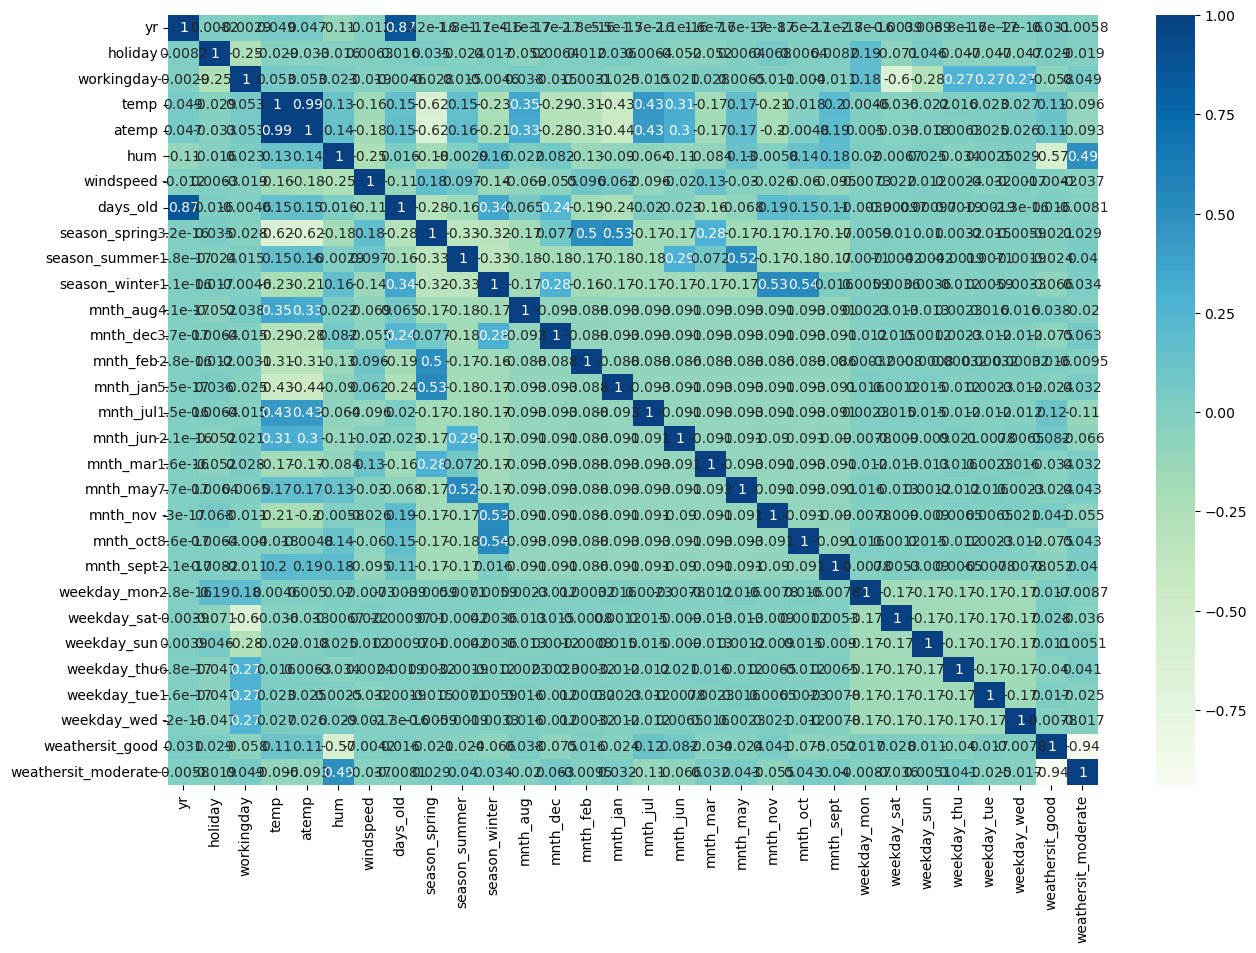

In [39]:
# Checking correlation of features again with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike.corr(), cmap='GnBu', annot=True)
plt.show()

### Model 2

#### Use RFE to eliminate some columns

In [40]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator = lr, n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

In [42]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 6),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 4),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 10),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 5),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 8),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 7),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

### Manual elimination

In [43]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [44]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_dec', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_nov', 'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [45]:
# Taking 20 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']]

In [46]:
X_train_rfe.shape

(510, 20)

In [47]:
rfe_selected_columns = X_train_rfe.columns

In [48]:
#Model with all variables selected by RFE
build_model(rfe_selected_columns)
get_vif(rfe_selected_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          4.71e-186
Time:                        12:08:44   Log-Likelihood:                -4104.9
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     489   BIC:                             8341.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 729.3975    

**Inference**: We have got a good R2 of 84.9 and Adj R2 of 84.3. But atemp has high p-value of 0.808 but its VIF is 371.56. So lets drop it and see if it impacts p-value and VIF of other variables.

### Model 3

In [50]:
#model without atemp
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.97e-187
Time:                        12:19:06   Log-Likelihood:                -4104.9
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     490   BIC:                             8335.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 725.3432    

**Inference**: Now we have a R2 of 84.9 and Adj R2 of 84.3 which has not changed after dropping atemp.
Now mnth_may has high p-value of 0.200 but its VIF is 1.59. However days_old has high VIF of 84.24 and also high p-value of 0.128. so lets drop days_old and see if it impacts p-value or VIF of other variables.

### Model 4

In [51]:
#model without atemp, days_old
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.00e-187
Time:                        12:23:24   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     491   BIC:                             8331.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 488.0938    

**Inference**: Now we have a R2 of 84.8 and Adj R2 of 84.3 which has not changed much after dropping days_old.
Now season_spring has high p-value of 0.342 and VIF of 7.16. so lets drop season_spring and see if it impacts p-value or VIF of other variables.

### Model 5

In [52]:
#model without atemp, days_old, season_spring
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.22e-188
Time:                        12:26:40   Log-Likelihood:                -4106.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     492   BIC:                             8325.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 336.8808    

**Inference**: Now we have a R2 of 84.8 and Adj R2 of 84.3 which has not changed after dropping season_spring. 
Now hum has high VIF of 20.95 but whose p-value is 0 so it is a significant variable but its just co-related to an other variable. But mnth_may has high p-value of 0.296 and VIF of 1.59. so lets drop mnth_may and see if it impacts p-value or VIF of other variables.


### Model 6

In [53]:
#model without atemp, days_old, season_spring, mnth_may
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.58e-189
Time:                        12:30:19   Log-Likelihood:                -4107.2
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     493   BIC:                             8320.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 276.4787    

**Inference**: Now we have a R2 of 84.8 and Adj R2 of 84.3 which has not changed after dropping mnth_may. 
Now hum still has high VIF of 20.86 but whose p-value is 0 so it is a significant variable but its just co-related to an other variable. But mnth_feb has high p-value of 0.173 and VIF of 1.59. so lets drop mnth_feb and see if it impacts p-value or VIF of other variables.

### Model 7

In [54]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug',
        'mnth_jan', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.3
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.89e-190
Time:                        12:32:46   Log-Likelihood:                -4108.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     494   BIC:                             8316.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 160.6958    

**Inference**: Now we have a R2 of 84.7 and Adj R2 of 84.2 which has slightly reduced after dropping mnth_feb. But still it is a good model.
Now hum still has high VIF of 19.41 but whose p-value is 0 so it is a significant variable but its just co-related to an other variable. But mnth_jan has high p-value of 0.025 and VIF of 1.67. so lets drop mnth_jan and see if it impacts p-value or VIF of other variables.

### Model 8

In [55]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug',
        'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.49e-190
Time:                        12:35:21   Log-Likelihood:                -4110.7
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     495   BIC:                             8315.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  23.1463    

**Inference**: Now we have a R2 of 84.5 and Adj R2 of 84.1 which has slightly reduced after dropping mnth_jan. But still it is a good model.
Now hum still has high VIF of 17.97 but whose p-value is 0 so it is a significant variable but its just co-related to an other variable. But mnth_oct has high p-value of 0.036 and VIF of 1.62. so lets drop mnth_oct and see if it impacts p-value or VIF of other variables.

### Model 9

In [56]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan, mnth_oct
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug',
        'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.52e-190
Time:                        12:37:29   Log-Likelihood:                -4113.0
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     496   BIC:                             8313.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.1942    

**Inference**: Now we have a R2 of 84.4 and Adj R2 of 84.0 which has slightly reduced after dropping mnth_oct. But still it is a good model.
Now weekday_sat and weekday_sun has slightly high p-value of 0.018 and 0.017 respectively. But hum is still having high VIF so now first lets drop hum and see if it impacts anything for the model

### Model 10

In [58]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan, mnth_oct, hum
cols = ['yr', 'holiday', 'temp', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.01e-187
Time:                        12:43:15   Log-Likelihood:                -4123.6
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     497   BIC:                             8328.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1251.5143    

**Inference**: Now we have a R2 of 83.7 and Adj R2 of 83.4 which has slightly reduced after dropping hum. But still it is a good model. Now lets drop weekday_sat because of its high p-value of 0.019

### Model 11

In [59]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan, mnth_oct, hum, weekday_sat
cols = ['yr', 'holiday', 'temp', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
        'weekday_sun', 'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.04e-187
Time:                        12:43:49   Log-Likelihood:                -4126.5
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     498   BIC:                             8328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1298.8708    

**Inference**: Now we have a R2 of 83.6 and Adj R2 of 83.2 which has slightly reduced after dropping weekday_sat. But still it is a good model. Now lets drop weekday_sun because of its high p-value of 0.021

### Model 12

In [62]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan, mnth_oct, hum, weekday_sat, weekday_sun
cols = ['yr', 'holiday', 'temp', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
        'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.62e-187
Time:                        12:46:38   Log-Likelihood:                -4129.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     499   BIC:                             8327.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1291.6177    

**Inference**: Now we have a R2 of 83.4 and Adj R2 of 83.1 which has slightly reduced after dropping weekday_sun. But still it is a good model. Now lets drop weathersit_good because of its high VIF 7.28 because w.r.t domain knowledge we know that temp plays a significant role for this case study

### Model 13

In [63]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan, mnth_oct, 
#hum, weekday_sat, weekday_sun, weathersit_good
cols = ['yr', 'holiday', 'temp', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
        'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.1
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.20e-163
Time:                        12:49:06   Log-Likelihood:                -4187.8
No. Observations:                 510   AIC:                             8396.
Df Residuals:                     500   BIC:                             8438.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1129.0582    

**Inference**: Now we have a R2 of 79.1 and Adj R2 of 78.7 which has reduced after dropping weathersit_good. But still it is a good model. Now lets drop holiday because of its p-value 0.05

### Model 14

In [65]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan, mnth_oct, 
#hum, weekday_sat, weekday_sun, weathersit_good, holiday
cols = ['yr', 'temp', 'windspeed',
        'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept',
        'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     232.2
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          3.94e-163
Time:                        12:56:10   Log-Likelihood:                -4191.9
No. Observations:                 510   AIC:                             8402.
Df Residuals:                     501   BIC:                             8440.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1093.9095    

**Inference**: Now we have a R2 of 78.8 and Adj R2 of 78.4 which has slightly reduced after dropping holiday. But still it is a good model. Now lets drop month_aug and see if VIF of temp reduces

### Model 15

In [67]:
#model without atemp, days_old, season_spring, mnth_may, mnth_feb, mnth_jan, mnth_oct, 
#hum, weekday_sat, weekday_sun, weathersit_good, holiday, month_aug
cols = ['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     259.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          2.52e-162
Time:                        12:56:42   Log-Likelihood:                -4196.6
No. Observations:                 510   AIC:                             8409.
Df Residuals:                     502   BIC:                             8443.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1048.3125    

**Inference**

Here VIF seems to be almost accepted. p-value for all the features is 0.0 and R2 is 0.784 and Adj R2 is 78.1
Let us select Model 15 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [68]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [69]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1048.3125273869814 [ 2074.44173121  4812.42782728 -1590.49396937   775.88271866
   993.87065921   767.00674595  -554.5871671 ]


## Step 7. Model Evaluation

### Residual Analysis

In [70]:
y_train_pred = lr.predict(X_train[cols])

In [71]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

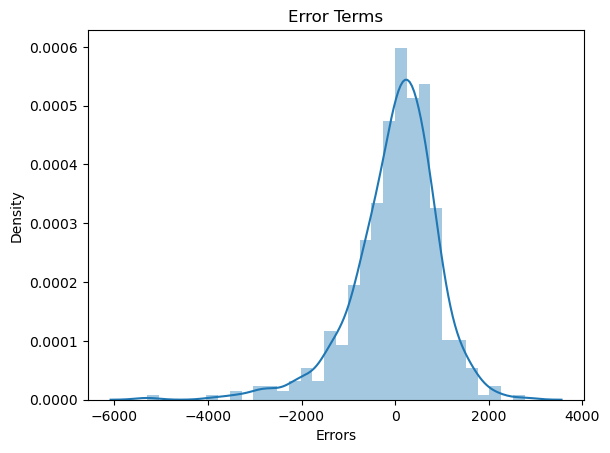

In [72]:
plot_res_dist(y_train, y_train_pred)

**Inference** Errors are normally distribured here with mean 0. So everything seems to be fine

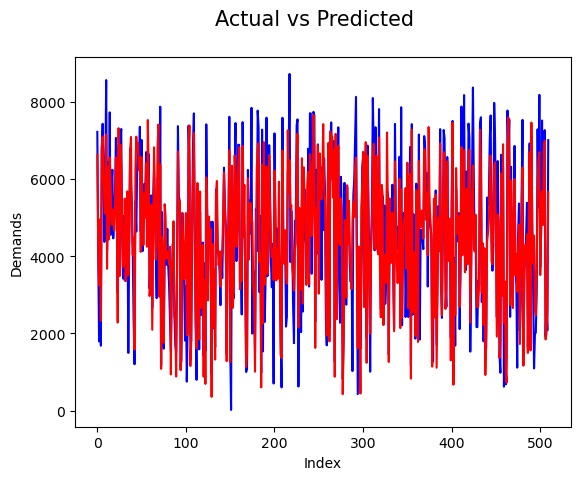

In [73]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**Inference** Actual and Predicted result following almost the same pattern so this model seems ok

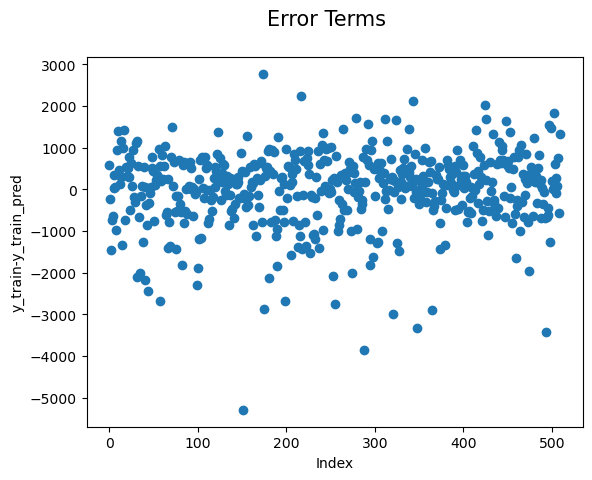

In [74]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.scatter(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

**Inference** We don't see any patterns in the error terms so out model is a decent model

In [75]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7835411265269938

**Inference** R2 is same as we obtained for our final model

### Predict values for test data set

In [76]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [77]:
#Columns from our final model
cols = ['yr', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sept', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### R-Squared value for test predictions

In [78]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7654799820290041

### Homoscedacity

**Inference**
R2 value for predictions on test data (0.765) and  R2 value of train data(0.783). This is a good R-squared value with 1.8% difference, hence we can see our model is performing pretty well on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

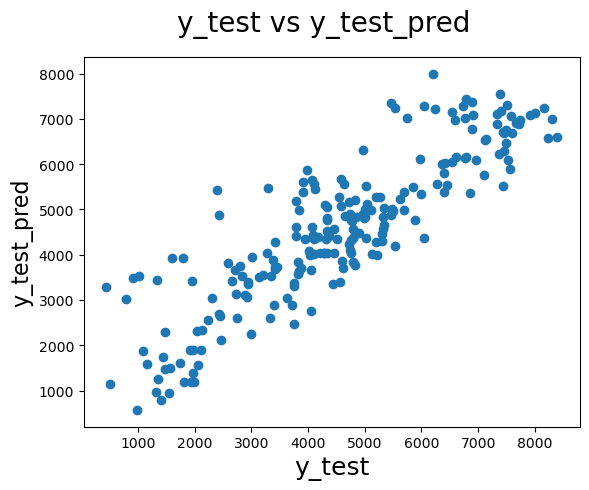

In [83]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

**Inference**
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Plot Test vs Predicted test values

In [84]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16) 

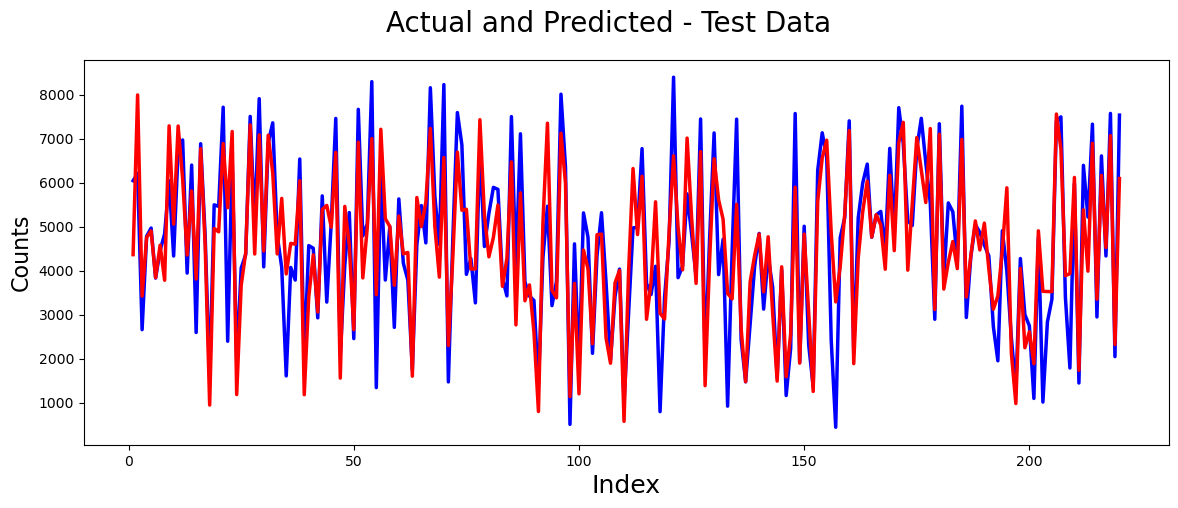

In [85]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

**Inference**
As we can see predictions for test data is very close to actuals

### Plot Error Terms for test data


In [93]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,221,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

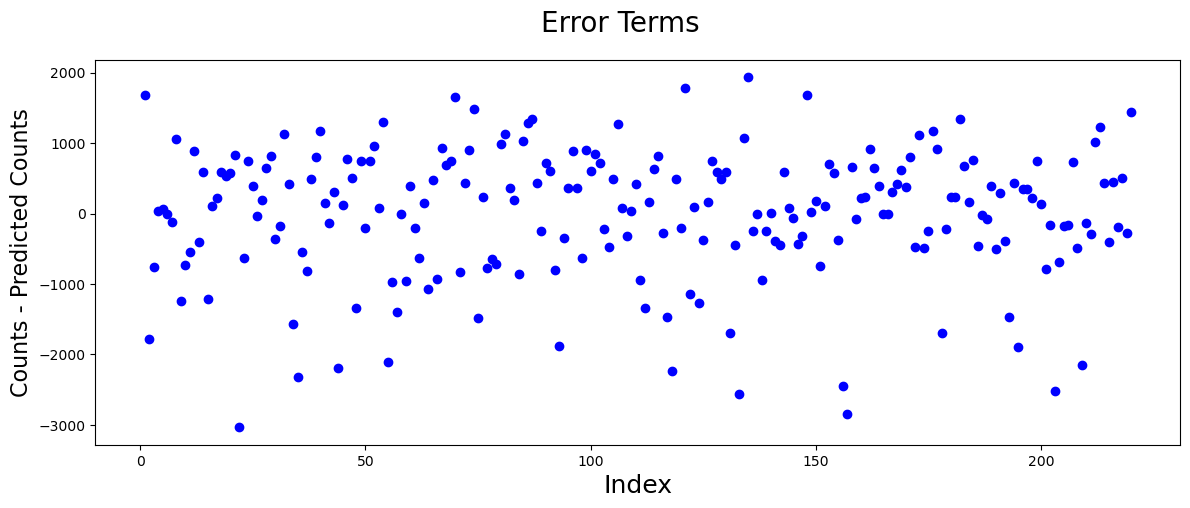

In [94]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

**Inference**
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

## Step 8. Making Predictions

**Interepretation of results**
Analysing the above model, the company should focus on the following features:
Company should focus on expanding business during summer and winter.
Company should focus on expanding business in the month of September.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.
Hence when the situation comes back to normal, the company should come up with new offers during summer and winter when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

**Conclusion**
Significant variables to predict the demand for shared bikes are
- yr
- temp
- windspeed
- season_summer
- season_winter
- mnth_sept
- weathersit_moderate